In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC  # Linear Support Vector Classifier
from sklearn.model_selection import cross_val_score, GridSearchCV  # Hyper parameter Tuning
from sklearn.metrics import confusion_matrix  
#from sklearn import metrics

In [2]:
import pandas as pd

In [3]:
# Data Source - https://catalog.data.gov/dataset/consumer-complaint-database  [ Public dataset]
df = pd.read_csv('C:/JS/Support_Vector_Machine/Consumer_Complaints.csv')

C:\Users\anparash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape  # 1.3 M records and 18 columns 

(1359973, 18)

In [10]:
df.head()  # Consumer complaint narrative 
df.sample(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
488562,09/18/2017,Mortgage,Conventional home mortgage,Closing on a mortgage,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30036,NaN,Consent not provided,Web,09/18/2017,Closed with explanation,Yes,NaN,2677547
431529,12/13/2017,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,94605,NaN,Consent not provided,Web,12/13/2017,Closed with explanation,Yes,NaN,2754644
74116,05/06/2019,Debt collection,I do not know,Took or threatened to take negative or legal a...,Threatened to sue you for very old debt,After repeated calls with no company name give...,NaN,"Sunset Solutions Group, LLC",TN,NaN,NaN,Consent provided,Web,05/06/2019,Untimely response,No,NaN,3233427
169920,12/19/2018,Checking or savings account,Checking account,Managing an account,Problem making or receiving payments,NaN,Company has responded to the consumer and the ...,REGIONS FINANCIAL CORPORATION,SC,29414,Servicemember,Consent not provided,Web,12/19/2018,Closed with monetary relief,Yes,NaN,3104906
219503,10/05/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Complaint : XXXX mortgage company has erroneou...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NC,283XX,"Older American, Servicemember",Consent provided,Web,10/05/2018,Closed with explanation,Yes,NaN,3038430


In [12]:
df.sample(2).T # column is row 

,510127,676446
Date received,08/26/2017,12/06/2016
Product,Credit card or prepaid card,Credit card
Sub-product,General-purpose credit card or charge card,NaN
Issue,Problem with a purchase shown on your statement,Late fee
Sub-issue,Credit card company isn't resolving a dispute ...,NaN
Consumer complaint narrative,I contacted Netspend regarding unauthorized ch...,NaN
Company public response,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...
Company,NETSPEND CORPORATION,BARCLAYS BANK DELAWARE
State,TX,NY
ZIP code,770XX,11701


In [13]:
# Create a new dataframe with only tow column Product and Consumer complaint narrative
df1 = df[['Product', 'Consumer complaint narrative']]

In [15]:
df1.sample(5)

,Product,Consumer complaint narrative
1289726,Mortgage,NaN
649108,Mortgage,"On XXXX XXXX, XXXX I mailed Qualified Written ..."
755957,Mortgage,NaN
197813,"Credit reporting, credit repair services, or o...",Public record of bankruptcy is showing on repo...
1161901,Mortgage,NaN


In [16]:
# Dataframe should have non  missing complaint narrative 
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

In [18]:
# How many valid complaints are present
df1.shape  # 425k valid complaint 

(425204, 2)

In [22]:
# What precentage of overall population we have in df1 
round((df1.shape[0]/len(df))*100,1)

# 31.3% of all the population but 425 k records 

31.3

In [24]:
# Rename columns 
df1.columns = ['Product', 'Consumer_complaint']

In [25]:
df1.head()

,Product,Consumer_complaint
1731,"Credit reporting, credit repair services, or o...",I couldn't believe my credit report when I saw...
1735,"Credit reporting, credit repair services, or o...",I did not sign up for an account with XXXX XXX...
1739,"Credit reporting, credit repair services, or o...",I went to my bank to get a loan so I can help ...
1741,"Credit reporting, credit repair services, or o...",I couldn't believe my credit report when I saw...
1747,"Credit reporting, credit repair services, or o...",I went to my bank and the lady there talked me...


In [27]:
# How many classes are there i.e how many different product names 
pd.DataFrame(df1.Product.unique()).values 

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit card or prepaid card'],
       ['Vehicle loan or lease'],
       ['Checking or savings account'],
       ['Payday loan, title loan, or personal loan'],
       ['Student loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Bank account or service'],
       ['Credit card'],
       ['Credit reporting'],
       ['Consumer Loan'],
       ['Money transfers'],
       ['Payday loan'],
       ['Prepaid card'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

In [32]:
# Count of unique values in Product column 
df1.Product.nunique()

18

In [33]:
# Build model only on 100k records 
df2 = df1.sample(10000, random_state=1).copy()

In [34]:
# Reduce the number of classes by eliminating redundant classes 

df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [35]:
pd.DataFrame(df2.Product.unique())   

,0
0,"Credit reporting, repair, or other"
1,Checking or savings account
2,Mortgage
3,Credit card or prepaid card
4,"Payday loan, title loan, or personal loan"
5,Consumer Loan
6,Debt collection
7,Student loan
8,Money transfers
9,Vehicle loan or lease


In [36]:
# Numeric represntation of product name

df2['category_id'] = df2['Product'].factorize()[0]
df2.head()

,Product,Consumer_complaint,category_id
136923,"Credit reporting, repair, or other",there are 8 inquires from XXXX XXXX that I did...,0
555141,"Credit reporting, repair, or other",I have been a victim of Identity Theft since X...,0
410364,Checking or savings account,UTTERLY disgusted with how Bank of America cho...,1
515245,"Credit reporting, repair, or other","A XXXX XXXX was purchased in XX/XX/XXXX, the c...",0
632795,Mortgage,"XXXX XXXX XXXX, XXXX, GA XXXX. My husband went...",2


In [37]:
# What is the category id of each produc 
category_id_df = df2[['Product', 'category_id']].drop_duplicates()
category_id_df

,Product,category_id
136923,"Credit reporting, repair, or other",0
410364,Checking or savings account,1
632795,Mortgage,2
604611,Credit card or prepaid card,3
792792,"Payday loan, title loan, or personal loan",4
592526,Consumer Loan,5
940536,Debt collection,6
440880,Student loan,7
758322,Money transfers,8
220702,Vehicle loan or lease,9


In [38]:
# Because model will predict category id 
# We need a function to derive product from category id 

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [39]:
id_to_category

{0: 'Credit reporting, repair, or other',
 1: 'Checking or savings account',
 2: 'Mortgage',
 3: 'Credit card or prepaid card',
 4: 'Payday loan, title loan, or personal loan',
 5: 'Consumer Loan',
 6: 'Debt collection',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Vehicle loan or lease',
 10: 'Bank account or service',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Other financial service'}

In [40]:
df2.head()

,Product,Consumer_complaint,category_id
136923,"Credit reporting, repair, or other",there are 8 inquires from XXXX XXXX that I did...,0
555141,"Credit reporting, repair, or other",I have been a victim of Identity Theft since X...,0
410364,Checking or savings account,UTTERLY disgusted with how Bank of America cho...,1
515245,"Credit reporting, repair, or other","A XXXX XXXX was purchased in XX/XX/XXXX, the c...",0
632795,Mortgage,"XXXX XXXX XXXX, XXXX, GA XXXX. My husband went...",2


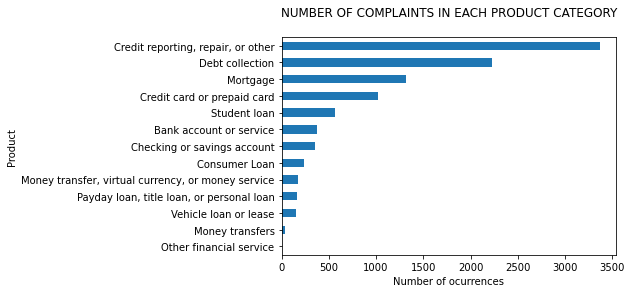

In [41]:
# Number of complaints for each product category 
%matplotlib inline
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

### Feature engineering from complaint narrative column 

In [42]:
# Feature extraction using tf-idf, unigram and bigram 
# sublinear_tf => scaling on term frequency 
# min_df => consider only those words, which are present in more than 5% of the documents 

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),  # Try uni-gram and bi-gram
                        stop_words='english') # Only cleaning step 

features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27593 features (TF-IDF score of unigrams and bigrams)


In [ ]:
# P greater than N scenario 

In [43]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)

In [44]:
# Support Vector classifier initialization and fit 
model = LinearSVC()  
model.fit(X_train, y_train)

LinearSVC()

In [45]:
# Prediction on train dataset
Train_pred = model.predict(X_train)

In [46]:
Train_pred

array([5, 6, 9, ..., 0, 2, 0], dtype=int64)

In [47]:
# To check how well the model is ding 
print(confusion_matrix(y_train,Train_pred))

[[2556    0    0    1    0    0    3    1    0    0    0    0    0]
 [   0  282    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0  976    0    0    0    0    0    0    0    0    0    0]
 [   5    0    0  792    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0  122    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0  170    0    0    0    0    0    0    0]
 [   4    0    1    0    0    0 1619    1    0    0    0    0    0]
 [   1    0    0    0    0    0    0  420    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0   24    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  115    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  267    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  127    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    7]]


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,Train_pred)  

0.9969333333333333

In [49]:
# Prediction on test data set
y_pred = model.predict(X_test)

In [50]:
print(confusion_matrix(y_test,y_pred))

[[693   2  15  23   1   3  67   7   0   1   2   0   0]
 [  7  35   1  12   0   0   0   0   0   0  18   1   0]
 [  6   0 316   3   0   0  10   0   0   0   1   0   0]
 [ 29   4   3 169   0   0  16   2   0   1   4   0   0]
 [  7   1   7   1  10   1  11   3   0   0   1   0   0]
 [ 16   1   4   2   1  19  11   3   0   5   0   0   0]
 [ 80   3  13  14   4   2 472   8   0   2   0   0   0]
 [ 13   0   1   1   0   0   8 118   0   0   0   0   0]
 [  0   0   1   3   0   0   3   0   0   0   1   5   0]
 [ 10   1   0   2   0   6   8   1   0  11   2   0   0]
 [  8  23   8  18   0   0   8   0   1   0  33   5   0]
 [  3   8   1   3   0   0   1   0   0   0   0  30   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0]]


In [51]:
accuracy_score(y_test,y_pred)

0.7624

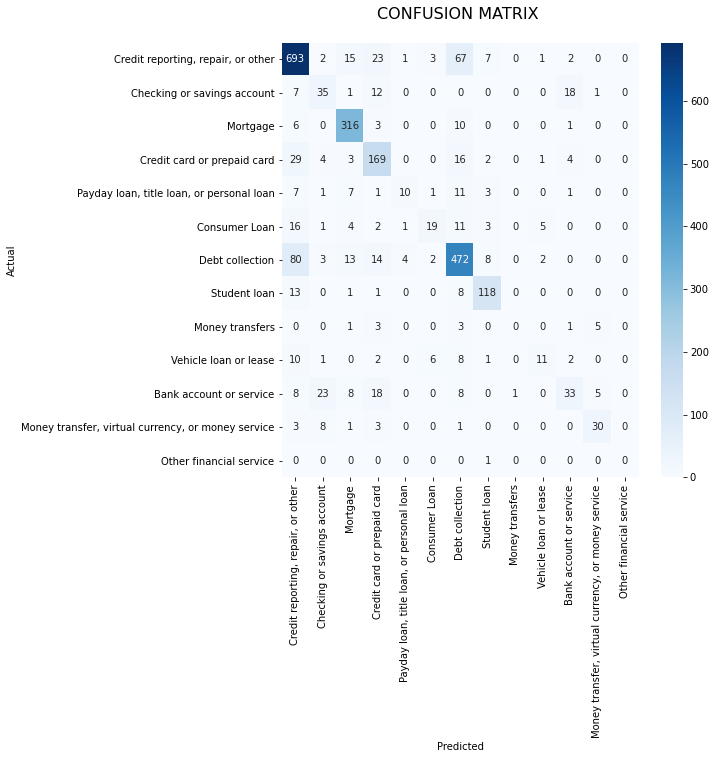

In [52]:
import seaborn as sns
%matplotlib inline
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

In [53]:
X = df2.Consumer_complaint
y = df2.Product

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

### Evaluation of model on some random complaint

In [55]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


In [56]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Credit reporting, repair, or other']


### Grid Search for hyper parameter tuning 

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Kernel - rbf, gamma = 0.001 & C =1 
# Kernel - rbf, gamma = 0.001 & C =10
# Kernel - rbf, gamma = 0.001 & C =100 
# Kernel - rbf, gamma = 0.001 & C =1000
# Kernel - rbf, gamma = 0.0001 & C =1 
# Kernel - rbf, gamma = 0.0001 & C =10
# Kernel - rbf, gamma = 0.0001 & C =100 
# Kernel - rbf, gamma = 0.0001 & C =1000
# Kernel - linear ( no need to provide gamma), C = 1
# Kerner - linear , C = 10 
# Kernel - linear , c = 100
# Kerner - linear , C = 1000

In [57]:
# Using RBF and Linear as my kernel function 

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10,]},
                    {'kernel': ['linear'], 'C': [1, 10]}]

In [ ]:
# Multiple combinations of hyperparameters 
# Building a model with 

# Kernel - rbf, gamma = 0.001 & C =1 
# Kernel - rbf, gamma = 0.001 & C =10
# Kernel - rbf, gamma = 0.0001 & C =1 
# Kernel - rbf, gamma = 0.0001 & C =10 
# Kernel - linear ( no need to provide gamma), C = 1
# Kerner - linear , C = 10 

In [58]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

In [ ]:
svm_model  = GridSearchCV(SVC(), params_grid, cv=5)
svm_model1 = svm_model.fit(tfidf_vectorizer_vectors, y_train)

In [ ]:
print(svm_model1.best_score_)   # Among all the iterations, what was the score of best model
print(svm_model1.best_params_)  # The combination of hyper parameters used in the best model 